In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats

We now turn to the situation where the mean of the population is NOT what we think it is.  In this case, we are hoping to detect this difference through our measurements.

For this example, we will assume that $\mu_{expected} = 100.0$ and that $\mu_{actual} = 90.0$

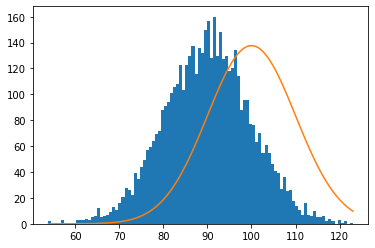

In [3]:
# Generate some data ... 5000 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 10.
npts = 5000
mu_actual = 90.0
mu_expected = 100.0
sigma = 10.0

x_actual = stats.norm.rvs(size=npts,loc=mu_actual,scale=sigma)
x_expected = stats.norm.rvs(size=npts,loc=mu_expected,scale=sigma)

# calculate the sample mean, and the sample standard deviation (unbiased).
xbar = np.mean(x_actual)
stdev = np.std(x_actual,ddof=1)

# create a plot that shows the histogram of the generated data, along with a curve of a Gaussian distribution based on the
# expected mean.

nbins = 100
plt.hist(x_actual,nbins)

bins=np.histogram(x_actual, bins=nbins)[1] #get the bin edges

dx = (bins[len(bins)-1] - bins[0])/nbins

amplitude = (npts*dx)/(np.sqrt(2*np.pi)*sigma)
xa = -1.0*(bins-mu_actual)**2/(2.0*sigma**2)
xe = -1.0*(bins-mu_expected)**2/(2.0*sigma**2)

ya = amplitude*np.exp(xa)
ye = amplitude*np.exp(xe)

#plt.plot(bins,ya)
plt.plot(bins,ye)


As we can see from the plot, it is pretty easy to tell in this case that the distribution that we are sampling from has a different mean value that the one that we expect.  But, as the difference between the actual mean and the expected mean becomes smaller, it becomes much harder to tell.

We can understand what is going on better if again consider the notion of performing our experiment many times.  Each time, we will get a new value of $\bar{x}$ from our sample.  We calculate a $z$ value for that sample, and then we can histogram all of the $z$ values, as before.  We now see that this histogram of the $z$ values is no longer a Gaussian with a centroid of zero, however, because we are sampling from a population that has a different mean than what we expect.

Z critical =  -1.6448536269514729
If we measure a value ABOVE z = z_critical, we will conclude that there is NOT a problem!!!


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 22., 13., 20., 14., 22., 19., 15.,
        19., 16., 14., 10.,  4., 10., 10., 10.,  7., 10.,  4.,  8.,  5.,
         5.,  7.,  2.,  1.,  4.,  5.,  1.,  2.,  1.,  0.,  1.,  1.,  1.,
         0.,  1.,  0.,  3.,  1.,  1.,  0.,  2.,  2.]),
 array([-5.14063763e+00, -5.07948534e+00, -5.01833305e+00, -4.95718077e+00,
        -4.89602848e+00, -4.83487619e+00, -4.77372390e+00, -4.71257161e+00,
        -4.65141932e+00, -4.59026703e+00, -4.52911475e+00, -4.46796246e+00,
        -4.40681017e+00, -4.34565788e+00, -4.28450559e+00, -4.22335330e+00,
        -4.16220102e+00, -4.10104873e+00, -4.03989644e+00, -3.97874415e+00,
        -3.91759186e+00, -3.85643957e+00, -3.79528729e

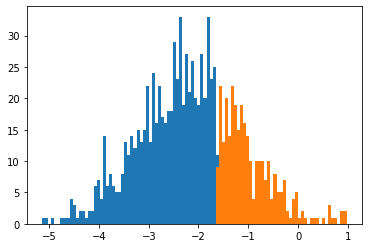

In [3]:
sem = sigma/np.sqrt(npts)
alpha = 0.05
zCritical = stats.norm.ppf(alpha)
xbarLower = mu_expected + zCritical*sem

print("Z critical = ",zCritical)
print("If we measure a value ABOVE z = z_critical, we will conclude that there is NOT a problem!!!")

# We will take a sample of 3000 points from a Gaussian distribution with mu_actual=99.5 and sigma=10.0, 
# and each time we do this, we will calculate xbar.  Then, we will calculate the z value corresponding 
# to that value of xbar.   Finally, we will create a histogram of these z-values.

mu_actual = 99.7

xbararray = []

# perform the experiment 10000 times
for i in range(1000):
    x = stats.norm.rvs(size=npts,loc=mu_actual,scale=sigma)
    xbararray.append(np.mean(x))
    
xbararray = np.array(xbararray)

# IMPORTANT!!! When we calculate the z value, we do so by comparing to the EXPECTED mean, mu_expected!!!
zscorearray = (xbararray-mu_expected)/sem
        
zhigh = zscorearray[(zscorearray>zCritical)]

bins=np.histogram(np.hstack((zscorearray,zhigh)), bins=nbins)[1] #get the bin edges

plt.hist(zscorearray,bins)
plt.hist(zhigh,bins)

The area shown in orange in the plot above corresponds to the probability that we have measured a value of z above the (alpha) critical value, and thus will conclude that there is NOT a problem (i.e. that our data is consistent with $\mu = 100.0$).  This probability is the TYPE II Error Probability, $\beta$.

In order to calculate this probability, $\beta$, we need the integral of the z distribution that corresponds to $\mu_{actual}$.  But, we do NOT know what $\mu_{actual}$ is!!!  So, we can only calculate $\beta$ as a function of $\mu_{actual}$.

mu_actual_guess, beta =  [99.4, 99.5, 99.60000000000001, 99.7, 99.80000000000001, 99.9] [0.0046913329311728535, 0.029333518278475523, 0.11829096822166019, 0.3168709569199907, 0.591202780206151, 0.8258127383820718]


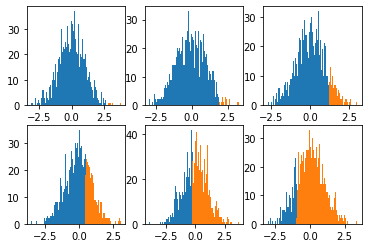

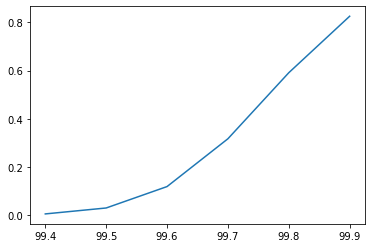

In [4]:
# IMPORTANT!!! When we calculate the z value, we do so by comparing to the EXPECTED mean, mu_expected!!!

fig, axs = plt.subplots(2, 3)

mu_actual_guess = []
beta = []
for i in range(6):
    yp = int(i%3)
    xp = int(i/3)
    mu_actual_guess.append(99.4 + i*0.1)
    
    xbararray = []

    # perform the experiment 1000 times
    for j in range(1000):
        x = stats.norm.rvs(size=npts,loc=mu_actual_guess[i],scale=sigma)
        xbararray.append(np.mean(x))
    
    xbararray = np.array(xbararray)

    zscorearray = (xbararray-mu_actual_guess[i])/sem

    xbar_alpha = mu_expected + zCritical*sem
    zbeta_critical = (xbar_alpha - mu_actual_guess[i])/sem
        
    zhigh = zscorearray[(zscorearray>zbeta_critical)]

    bins=np.histogram(np.hstack((zscorearray,zhigh)), bins=nbins)[1] #get the bin edges

    axs[xp,yp].hist(zscorearray,bins)
    axs[xp,yp].hist(zhigh,bins)

    beta.append(1.0 - stats.norm.cdf(zbeta_critical))
    
fig, axs = plt.subplots(1,1)
axs.plot(mu_actual_guess,beta)
    
print("mu_actual_guess, beta = ",mu_actual_guess,beta)

In [5]:
# Step 1:  Choose a value of alpha that you can live with

alpha = 0.05

# Step 2:  Choose a value of beta that you can live with

beta = 0.01

# Step 3:  Choose a sensitivity that you want to be able to detect - delta(mu)

delta_mu = 5.0

# Step 4:  Calculate z_alpha

z_alpha = stats.norm.ppf(alpha)

# Step 5:  Calculate z_beta

z_beta = stats.norm.ppf(1-beta)

# Step 6:  Calculate N

N = (sigma*(z_beta-z_alpha)/delta_mu)**2

print (z_alpha,z_beta,sigma,delta_mu)

print("N = ",N)

-1.6448536269514729 2.3263478740408408 10.0 5.0
N =  63.081765445934415


In [25]:
from statsmodels.stats import power

Np = power.tt_ind_solve_power(effect_size = delta_mu/sigma, alpha=alpha, power=1-beta)

print ("Nobs = ",Np)

effect_size = power.tt_ind_solve_power(alpha=alpha, power=1-beta, nobs1=Np)

print ("Delta_mu = ",effect_size*sigma)

Nobs =  17442.872915839584
Delta_mu =  0.3000004599112046


In [24]:
from statsmodels.stats import power

Np = power.tt_ind_solve_power(effect_size = np.sqrt(2.0)*delta_mu/sigma, alpha=2.0*alpha, power=1-beta)

print ("Nobs = ",Np,N)

effect_size = power.tt_ind_solve_power(alpha=2.0*alpha, power=1-beta, nobs1=N)

print ("Delta_mu = ",effect_size*sigma/np.sqrt(2))

Nobs =  6869.82859639288 6869.508035577523
Delta_mu =  0.30000732470353164
